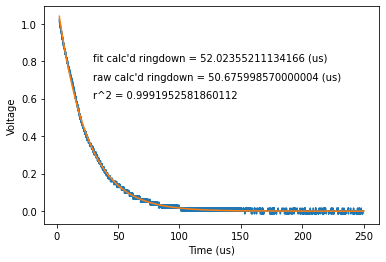

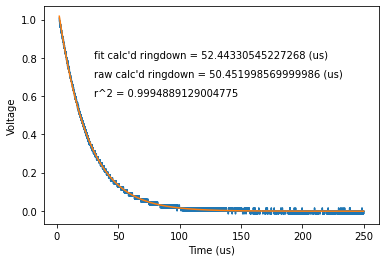

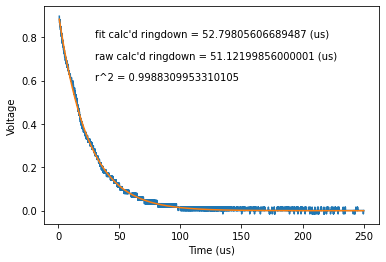

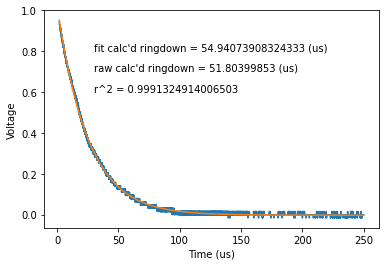

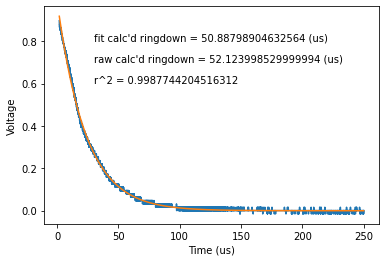

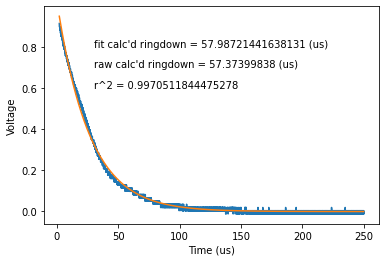

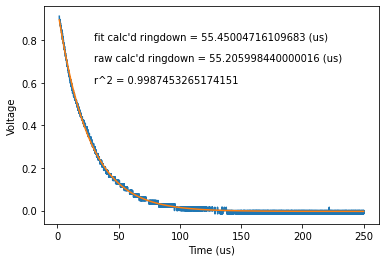

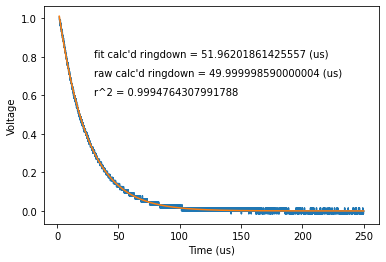

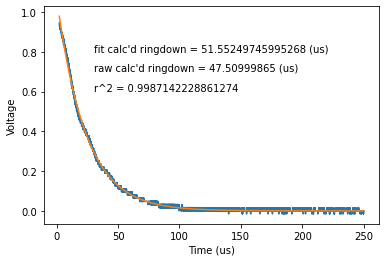

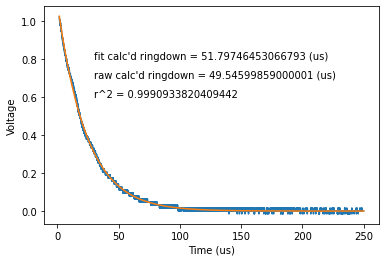

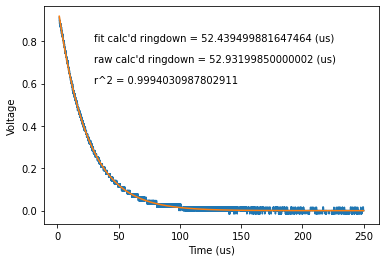

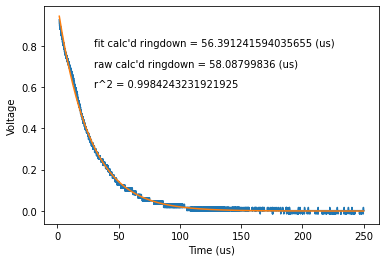

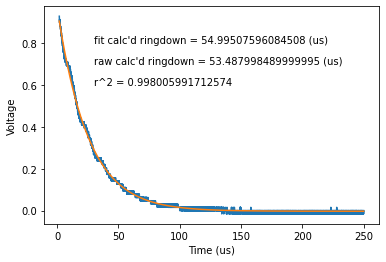

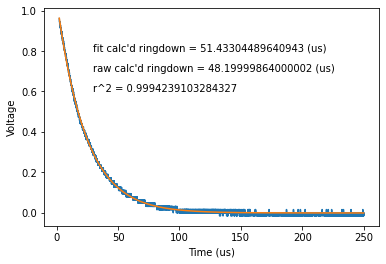

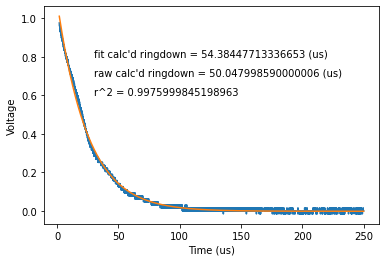

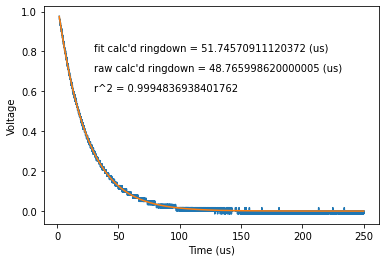

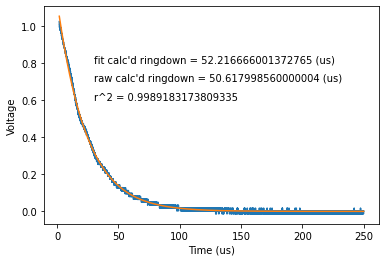

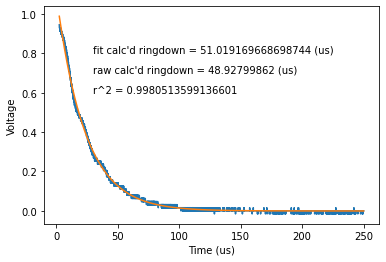

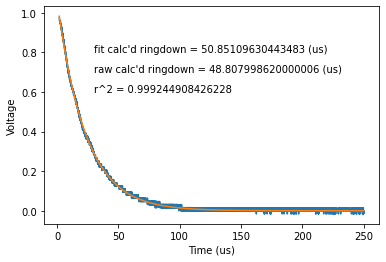

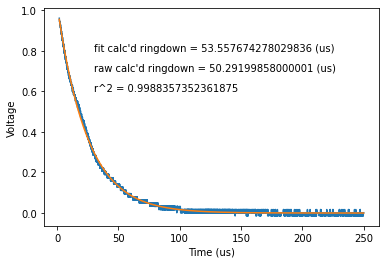

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline

def decay(x,a,b,c):
    #c = tau    
    return a + b*np.exp(-x/c)

data_path = '20211104-0002/'
data_files = glob.glob(data_path + '*.csv')
ring_downs = []

for i in data_files:
    plt.figure()
    data = pd.read_csv(i, skiprows=1) 
    start_full = data.loc[(data['(V)'] == max(data['(V)']))].last_valid_index()
    end_full = data.loc[(data['(us)'] >= 250)].first_valid_index()
    
    data2 = data[start_full:end_full]
    
    #need to do 0.9 and 0.1 times the voltage and find the times for those

    time = data['(us)']
    time = time[start_full:end_full]
    voltage = data['(V)']
    voltage = voltage[start_full:end_full]
    
    popt, pcov = curve_fit(decay, time, voltage)
    
    residuals = voltage - decay(time, *popt)
    res_ss = np.sum(residuals**2)
    ss_tot = np.sum((voltage - np.mean(voltage))**2)
    r_squared = 1 - (res_ss / ss_tot)
    
    start = data2.loc[(data2['(V)'] <= max(data2['(V)'])*0.9)].first_valid_index()
    end = data2.loc[(data2['(V)'] <= max(data2['(V)'])*0.1)].first_valid_index()
    
    raw_time = data2['(us)']
    raw_time = raw_time[start:end]
    raw_ringdown = max(raw_time)-min(raw_time)

    ring_downs.append(popt[2]*2.198)
    
    plt.plot(time, voltage)
    plt.plot(time, decay(time, *popt))
    plt.xlabel('Time (us)')
    plt.ylabel('Voltage')
    plt.text(30,0.8, 'fit calc\'d ringdown = ' +str(popt[2]*2.198) + ' (us)')
    plt.text(30,0.7, 'raw calc\'d ringdown = ' + str(raw_ringdown) + ' (us)')
    plt.text(30,0.6, 'r^2 = ' + str(r_squared))


In [5]:
print(np.mean(ring_downs), np.std(ring_downs))

52.93633878518688 1.8937207913800207
